In [1]:
import numpy as np
import pandas as pd

In [2]:
node_info = pd.read_csv('data/node_information.csv', header=None)
node_info.columns = ['id', 'year', 'title', 'authors', 'journal', 'abstract']
node_info.head()

,id,year,title,authors,journal,abstract
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...


In [3]:
train = pd.read_csv('train_treated.csv', index_col=0)
train.head()

,id1,id2,link,rno1,rno2,sim
0,9510123,9502114,1,16827,15446,0.064373
1,9707075,9604178,1,21154,18059,0.021211
2,9312155,9506142,0,13074,16171,0.017202
3,9911255,302165,0,27486,9702,0.012634
4,9701033,209076,0,19856,8212,0.059588


In [4]:
test = pd.read_csv('test_treated.csv', index_col=0)
test.head()

,id1,id2,rno1,rno2,sim
0,9807076,9807139,23774,23835,0.071870
1,109162,1182,5227,172,0.163040
2,9702187,9510135,20185,16838,0.138004
3,111048,110115,5621,5397,0.101857
4,9910176,9410073,27159,14643,0.091231


## year difference

In [5]:
train['year1'] = train.apply(lambda row: node_info.loc[node_info['id']==row['id1'], 'year'].values[0], axis=1)
train['year2'] = train.apply(lambda row: node_info.loc[node_info['id']==row['id2'], 'year'].values[0], axis=1)
train['year_diff'] = train.apply(lambda row: row['year1'] - row['year2'], axis=1)
train['year_diff'] = train['year_diff'].astype(int)
train.head()

,id1,id2,link,rno1,rno2,sim,year1,year2,year_diff
0,9510123,9502114,1,16827,15446,0.064373,1995,1995,0.0
1,9707075,9604178,1,21154,18059,0.021211,1997,1996,1.0
2,9312155,9506142,0,13074,16171,0.017202,1993,1995,-2.0
3,9911255,302165,0,27486,9702,0.012634,1999,2003,-4.0
4,9701033,209076,0,19856,8212,0.059588,1997,2002,-5.0


In [7]:
test['year1'] = test.apply(lambda row: node_info.loc[node_info['id']==row['id1'], 'year'].values[0], axis=1)
test['year2'] = test.apply(lambda row: node_info.loc[node_info['id']==row['id2'], 'year'].values[0], axis=1)
test['year_diff'] = test.apply(lambda row: row['year1'] - row['year2'], axis=1)
test['year_diff'] = test['year_diff'].astype(int)
test.head()

,id1,id2,rno1,rno2,sim,year1,year2,diff_year,year_diff
0,9807076,9807139,23774,23835,0.071870,1998,1998,0.0,0
1,109162,1182,5227,172,0.163040,2001,2000,1.0,1
2,9702187,9510135,20185,16838,0.138004,1997,1995,2.0,2
3,111048,110115,5621,5397,0.101857,2001,2001,0.0,0
4,9910176,9410073,27159,14643,0.091231,1999,1994,5.0,5


## common authors

In [14]:
def processAuthor(authors):
    names = authors.split(',')
    names = [name.replace('.', ' ').split() for name in names]
    names = set([' '.join(name) for name in names])
    return names

In [32]:
node_info['authors_split'] = node_info.apply(lambda row: processAuthor(row['authors'].lower()) 
                                             if isinstance(row['authors'], str) else set(), 
                                             axis=1)
node_info.head()

,id,year,title,authors,journal,abstract,authors_split
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...,{paul s aspinwall}
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,"{m cvetic, c n pope, h lu}"
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...,"{gungwon kang, y s myung}"
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,{adam d helfer}
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...,"{c schweigert, j fuchs}"


In [49]:
def computeCommonAuthors(id1, id2):
    authors1 = node_info.loc[node_info['id']==id1, 'authors_split'].values[0]
    authors2 = node_info.loc[node_info['id']==id2, 'authors_split'].values[0]
    return len(authors1 & authors2)

In [53]:
train['common_authors'] = train.apply(lambda row: computeCommonAuthors(row['id1'], row['id2']), axis=1)
train.head()

,id1,id2,link,rno1,rno2,sim,year1,year2,year_diff,common_authors
0,9510123,9502114,1,16827,15446,0.064373,1995,1995,0,0
1,9707075,9604178,1,21154,18059,0.021211,1997,1996,1,0
2,9312155,9506142,0,13074,16171,0.017202,1993,1995,-2,0
3,9911255,302165,0,27486,9702,0.012634,1999,2003,-4,0
4,9701033,209076,0,19856,8212,0.059588,1997,2002,-5,0


In [54]:
test['common_authors'] = test.apply(lambda row: computeCommonAuthors(row['id1'], row['id2']), axis=1)
test.head()

,id1,id2,rno1,rno2,sim,year1,year2,diff_year,year_diff,common_authors
0,9807076,9807139,23774,23835,0.071870,1998,1998,0.0,0,0
1,109162,1182,5227,172,0.163040,2001,2000,1.0,1,0
2,9702187,9510135,20185,16838,0.138004,1997,1995,2.0,2,0
3,111048,110115,5621,5397,0.101857,2001,2001,0.0,0,0
4,9910176,9410073,27159,14643,0.091231,1999,1994,5.0,5,0


## graph prediction

In [55]:
train_graph = pd.read_csv('train_by_nx.csv', index_col=0)
train_graph.head()

,id1,id2,link,pa,rai,aai,jc,pred_pa,pred_rai,pred_aai,pred_jc
0,9510123,9502114,1,72.0,0.142857,0.513898,0.058824,0,1,1,1
1,9707075,9604178,1,11613.0,0.226401,4.320366,0.097087,1,1,1,1
2,9312155,9506142,0,5.0,0.000000,0.000000,0.000000,0,0,0,0
3,9911255,302165,0,280.0,0.000000,0.000000,0.000000,0,0,0,0
4,9701033,209076,0,168.0,0.000000,0.000000,0.000000,0,0,0,0


In [56]:
train_graph['pred'] = train_graph.apply(lambda row: 1 if (row['pred_rai']+row['pred_aai']+row['pred_jc'])>1 else 0, 
                                        axis=1)
train_graph.head()

,id1,id2,link,pa,rai,aai,jc,pred_pa,pred_rai,pred_aai,pred_jc,pred
0,9510123,9502114,1,72.0,0.142857,0.513898,0.058824,0,1,1,1,1
1,9707075,9604178,1,11613.0,0.226401,4.320366,0.097087,1,1,1,1,1
2,9312155,9506142,0,5.0,0.000000,0.000000,0.000000,0,0,0,0,0
3,9911255,302165,0,280.0,0.000000,0.000000,0.000000,0,0,0,0,0
4,9701033,209076,0,168.0,0.000000,0.000000,0.000000,0,0,0,0,0


In [57]:
test_graph = pd.read_csv('test_by_nx.csv', index_col=0)
test_graph['pred'] = test_graph.apply(lambda row: 1 if (row['pred_rai']+row['pred_aai']+row['pred_jc'])>1 else 0, 
                                        axis=1)
test_graph.head()

,id1,id2,pa,rai,aai,jc,pred_pa,pred_rai,pred_aai,pred_jc,pred
0,9807076,9807139,1062.0,0.000000,0.000000,0.000000,1,0,0,0,0
1,109162,1182,13590.0,0.311535,5.377973,0.074303,1,1,1,1,1
2,9702187,9510135,164797.0,1.342594,15.053612,0.065338,1,1,1,1,1
3,111048,110115,3315.0,0.298419,4.899424,0.221053,1,1,1,1,1
4,9910176,9410073,1050.0,0.000000,0.000000,0.000000,1,0,0,0,0


In [58]:
train['graph_pred'] = train_graph['pred']
train.head()

,id1,id2,link,rno1,rno2,sim,year1,year2,year_diff,common_authors,graph_pred
0,9510123,9502114,1,16827,15446,0.064373,1995,1995,0,0,1
1,9707075,9604178,1,21154,18059,0.021211,1997,1996,1,0,1
2,9312155,9506142,0,13074,16171,0.017202,1993,1995,-2,0,0
3,9911255,302165,0,27486,9702,0.012634,1999,2003,-4,0,0
4,9701033,209076,0,19856,8212,0.059588,1997,2002,-5,0,0


In [59]:
test['graph_pred'] = test_graph['pred']
test.head()

,id1,id2,rno1,rno2,sim,year1,year2,diff_year,year_diff,common_authors,graph_pred
0,9807076,9807139,23774,23835,0.071870,1998,1998,0.0,0,0,0
1,109162,1182,5227,172,0.163040,2001,2000,1.0,1,0,1
2,9702187,9510135,20185,16838,0.138004,1997,1995,2.0,2,0,1
3,111048,110115,5621,5397,0.101857,2001,2001,0.0,0,0,1
4,9910176,9410073,27159,14643,0.091231,1999,1994,5.0,5,0,0


## title overlapping

In [60]:
import nltk
stpwds = set(nltk.corpus.stopwords.words('english'))
stemmer = nltk.stem.PorterStemmer()

In [64]:
def processTitle(title):
    if not isinstance(title, str):
        return set()
    t = title.split()
    t = [token for token in t if token not in stpwds]
    t = [stemmer.stem(token) for token in t]
    return set(t)

In [65]:
node_info['title_split'] = node_info.apply(lambda row: processTitle(row['title']), axis=1)
node_info.head()

,id,year,title,authors,journal,abstract,authors_split,title_split
0,1001,2000,compactification geometry and duality,Paul S. Aspinwall,NaN,these are notes based on lectures given at tas...,{paul s aspinwall},"{geometri, dualiti, compactif}"
1,1002,2000,domain walls and massive gauged supergravity p...,"M. Cvetic, H. Lu, C.N. Pope",Class.Quant.Grav.,we point out that massive gauged supergravity ...,"{m cvetic, c n pope, h lu}","{potenti, gaug, massiv, domain, supergrav, wall}"
2,1003,2000,comment on metric fluctuations in brane worlds,"Y.S. Myung, Gungwon Kang",NaN,recently ivanov and volovich hep-th 9912242 cl...,"{gungwon kang, y s myung}","{comment, metric, brane, world, fluctuat}"
3,1004,2000,moving mirrors and thermodynamic paradoxes,Adam D. Helfer,Phys.Rev.,quantum fields responding to moving mirrors ha...,{adam d helfer},"{thermodynam, paradox, mirror, move}"
4,1005,2000,bundles of chiral blocks and boundary conditio...,"J. Fuchs, C. Schweigert",NaN,proceedings of lie iii clausthal july 1999 var...,"{c schweigert, j fuchs}","{block, cft, chiral, condit, bundl, boundari}"


In [66]:
def computeOverlapTitle(id1, id2):
    title1 = node_info.loc[node_info['id']==id1, 'title_split'].values[0]
    title2 = node_info.loc[node_info['id']==id2, 'title_split'].values[0]
    return len(title1 & title2)

In [67]:
train['title_overlap'] = train.apply(lambda row: computeOverlapTitle(row['id1'], row['id2']), axis=1)
train.head()

,id1,id2,link,rno1,rno2,sim,year1,year2,year_diff,common_authors,graph_pred,title_overlap
0,9510123,9502114,1,16827,15446,0.064373,1995,1995,0,0,1,2
1,9707075,9604178,1,21154,18059,0.021211,1997,1996,1,0,1,1
2,9312155,9506142,0,13074,16171,0.017202,1993,1995,-2,0,0,0
3,9911255,302165,0,27486,9702,0.012634,1999,2003,-4,0,0,0
4,9701033,209076,0,19856,8212,0.059588,1997,2002,-5,0,0,0


In [71]:
test['title_overlap'] = test.apply(lambda row: computeOverlapTitle(row['id1'], row['id2']), axis=1)
test.head()

,id1,id2,rno1,rno2,sim,year1,year2,year_diff,common_authors,graph_pred,title_overlap
0,9807076,9807139,23774,23835,0.071870,1998,1998,0,0,0,0
1,109162,1182,5227,172,0.163040,2001,2000,1,0,1,2
2,9702187,9510135,20185,16838,0.138004,1997,1995,2,0,1,1
3,111048,110115,5621,5397,0.101857,2001,2001,0,0,1,1
4,9910176,9410073,27159,14643,0.091231,1999,1994,5,0,0,0


## training and cross-validation

In [72]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import  MLPClassifier
from sklearn.utils import shuffle

In [79]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
X_train = train[['sim', 'year_diff', 'common_authors', 'title_overlap', 'graph_pred']].values
y_train = train['link'].values
X_test = test[['sim', 'year_diff', 'common_authors', 'title_overlap', 'graph_pred']].values
X_train.shape

(615512, 5)

In [80]:
X_train = normalize(X_train)
X_test = normalize(X_test)
X_train, y_train = shuffle(X_train, y_train)

In [81]:
f1_scores = []
for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=(10, 5), 
                        alpha=alpha, 
                        max_iter=500, 
                        tol=1e-5,
                        verbose=True)
    accuracy = cross_val_score(clf, 
                               X_train, 
                               y_train, 
                               cv=5, 
                               scoring='f1', 
                               n_jobs=-1).mean()
    f1_scores.append(accuracy)
f1_scores

Iteration 1, loss = 0.19391591
Iteration 1, loss = 0.19269004
Iteration 1, loss = 0.19202641
Iteration 1, loss = 0.19324635
Iteration 2, loss = 0.11595245
Iteration 2, loss = 0.11657824
Iteration 2, loss = 0.11601181
Iteration 2, loss = 0.11678786
Iteration 3, loss = 0.11327494
Iteration 3, loss = 0.11395152
Iteration 3, loss = 0.11327578
Iteration 3, loss = 0.11381893
Iteration 4, loss = 0.11213078
Iteration 4, loss = 0.11271955
Iteration 4, loss = 0.11219484
Iteration 4, loss = 0.11254294
Iteration 5, loss = 0.11111719
Iteration 5, loss = 0.11165518
Iteration 5, loss = 0.11119874
Iteration 5, loss = 0.11160837
Iteration 6, loss = 0.11114214
Iteration 6, loss = 0.11063658
Iteration 6, loss = 0.11060503
Iteration 6, loss = 0.11126512
Iteration 7, loss = 0.11085414
Iteration 7, loss = 0.11024095
Iteration 7, loss = 0.11027974
Iteration 7, loss = 0.11095793
Iteration 8, loss = 0.11063764
Iteration 8, loss = 0.11000887
Iteration 8, loss = 0.11068767
Iteration 8, loss = 0.10994302
Iteratio

Iteration 17, loss = 0.10933600
Iteration 17, loss = 0.10952755
Iteration 18, loss = 0.10909430
Iteration 18, loss = 0.10864653
Iteration 18, loss = 0.10930928
Iteration 18, loss = 0.10937808
Iteration 19, loss = 0.10860826
Iteration 19, loss = 0.10898014
Iteration 19, loss = 0.10931799
Iteration 19, loss = 0.10918698
Iteration 20, loss = 0.10851931
Iteration 20, loss = 0.10893276
Iteration 20, loss = 0.10924963
Iteration 20, loss = 0.10918090
Iteration 21, loss = 0.10852642
Iteration 21, loss = 0.10920660
Iteration 21, loss = 0.10888049
Iteration 21, loss = 0.10908087
Iteration 22, loss = 0.10846483
Iteration 22, loss = 0.10916543
Iteration 22, loss = 0.10904059
Iteration 22, loss = 0.10879614
Iteration 23, loss = 0.10843003
Iteration 23, loss = 0.10915656
Iteration 23, loss = 0.10905290
Iteration 23, loss = 0.10877192
Iteration 24, loss = 0.10839872
Iteration 24, loss = 0.10911092
Iteration 24, loss = 0.10900156
Iteration 24, loss = 0.10865408
Iteration 25, loss = 0.10836244
Iteratio

Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
Iteration 32, loss = 0.10878855
Iteration 32, loss = 0.10935916
Iteration 32, loss = 0.10889340
Iteration 1, loss = 0.21584907
Iteration 33, loss = 0.10878411
Iteration 33, loss = 0.10934593
Iteration 2, loss = 0.12252946
Iteration 33, loss = 0.10881504
Iteration 34, loss = 0.10869407
Iteration 34, loss = 0.10935611
Iteration 3, loss = 0.11875404
Iteration 34, loss = 0.10876538
Iteration 35, loss = 0.10861560
Iteration 35, loss = 0.10935239
Iteration 4, loss = 0.11682196
Iteration 35, loss = 0.10873880
Iteration 5, loss = 0.11522979
Iteration 36, loss = 0.10858282
Iteration 36, loss = 0.10933713
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
Iteration 36, loss = 0.10873129
Iteration 6, loss = 0.11383804
Iteration 37, loss = 0.10856835
Iteration 37, loss = 0.10873535
Iteration 7, loss = 0.11273239
Iteration 38, loss = 0.10846640
Iteration 39, loss = 0.10

Iteration 13, loss = 0.11225963
Iteration 43, loss = 0.11065571
Iteration 41, loss = 0.11195953
Iteration 14, loss = 0.11211450
Iteration 44, loss = 0.11063998
Iteration 42, loss = 0.11202384
Iteration 45, loss = 0.11073151
Iteration 15, loss = 0.11199788
Iteration 46, loss = 0.11068884
Iteration 16, loss = 0.11197722
Iteration 43, loss = 0.11203984
Iteration 47, loss = 0.11062394
Iteration 17, loss = 0.11183486
Iteration 44, loss = 0.11196767
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
Iteration 48, loss = 0.11063194
Iteration 18, loss = 0.11187985
Iteration 49, loss = 0.11070052
Iteration 19, loss = 0.11177708
Iteration 50, loss = 0.11072480
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
Iteration 20, loss = 0.11174690
Iteration 21, loss = 0.11172266
Iteration 22, loss = 0.11169118
Iteration 23, loss = 0.11166146
Iteration 24, loss = 0.11167208
Iteration 25, loss = 0.11162518
Iteration 26, loss

Iteration 1, loss = 0.26965044
Iteration 1, loss = 0.27053940
Iteration 1, loss = 0.26860048
Iteration 1, loss = 0.26952865
Iteration 2, loss = 0.20355169
Iteration 2, loss = 0.20388934
Iteration 2, loss = 0.20327800
Iteration 2, loss = 0.20394734
Iteration 3, loss = 0.19953557
Iteration 3, loss = 0.19993520
Iteration 3, loss = 0.19997993
Iteration 3, loss = 0.19933750
Iteration 4, loss = 0.19847983
Iteration 4, loss = 0.19886879
Iteration 4, loss = 0.19826909
Iteration 4, loss = 0.19893304
Iteration 5, loss = 0.19810349
Iteration 5, loss = 0.19848783
Iteration 5, loss = 0.19788689
Iteration 5, loss = 0.19855877
Iteration 6, loss = 0.19798034
Iteration 6, loss = 0.19832617
Iteration 6, loss = 0.19776216
Iteration 6, loss = 0.19845248
Iteration 7, loss = 0.19789902
Iteration 7, loss = 0.19826177
Iteration 7, loss = 0.19768705
Iteration 7, loss = 0.19831861
Iteration 8, loss = 0.19782879
Iteration 8, loss = 0.19820108
Iteration 8, loss = 0.19757391
Iteration 8, loss = 0.19824735
Iteratio

[0.9699970659715913,
 0.96995801722945,
 0.9700093382084922,
 0.9698436089402058,
 0.9693278486942362,
 0.9667602550046942]

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

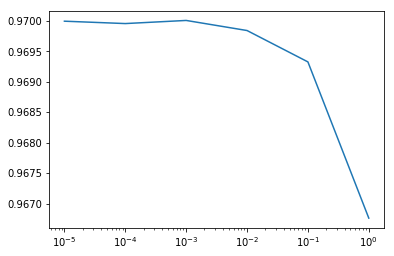

In [84]:
fig = plt.figure()
plt.xscale('log')
plt.plot(alphas, f1_scores)

In [85]:
clf = MLPClassifier(hidden_layer_sizes=(10, 5), 
                    alpha=1e-3, 
                    max_iter=500, 
                    tol=1e-5,
                    verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.17793169
Iteration 2, loss = 0.11491154
Iteration 3, loss = 0.11306293
Iteration 4, loss = 0.11185990
Iteration 5, loss = 0.11112431
Iteration 6, loss = 0.11076023
Iteration 7, loss = 0.11038785
Iteration 8, loss = 0.11024552
Iteration 9, loss = 0.11001581
Iteration 10, loss = 0.10985000
Iteration 11, loss = 0.10969251
Iteration 12, loss = 0.10955845
Iteration 13, loss = 0.10945984
Iteration 14, loss = 0.10935913
Iteration 15, loss = 0.10929808
Iteration 16, loss = 0.10928825
Iteration 17, loss = 0.10918117
Iteration 18, loss = 0.10918009
Iteration 19, loss = 0.10919075
Iteration 20, loss = 0.10909128
Iteration 21, loss = 0.10909915
Iteration 22, loss = 0.10907556
Iteration 23, loss = 0.10902277
Iteration 24, loss = 0.10902000
Iteration 25, loss = 0.10904758
Iteration 26, loss = 0.10898475
Iteration 27, loss = 0.10894501
Iteration 28, loss = 0.10896081
Iteration 29, loss = 0.10893795
Iteration 30, loss = 0.10896497
Training loss did not improve more than tol=0.000

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-05, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [86]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [90]:
y_pred = pd.Series(y_pred)
y_pred

0        0
1        1
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       0
16       0
17       1
18       1
19       1
20       1
21       0
22       1
23       1
24       0
25       0
26       1
27       1
28       0
29       0
        ..
32618    0
32619    1
32620    1
32621    0
32622    1
32623    0
32624    0
32625    0
32626    1
32627    0
32628    1
32629    0
32630    0
32631    1
32632    1
32633    0
32634    0
32635    1
32636    1
32637    0
32638    0
32639    0
32640    0
32641    0
32642    1
32643    1
32644    0
32645    0
32646    0
32647    1
Length: 32648, dtype: int64

In [92]:
sub_nn = pd.DataFrame()
sub_nn['category'] = y_pred
sub_nn

,category
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,1


In [93]:
sub_nn.index.name='id'
sub_nn.to_csv('sub_nn.csv')

In [94]:
sub_nn.head()

,category
id,
0,0
1,1
2,1
3,1
4,0
